In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#Comprises of data from 2015-2020
df = pd.read_csv(r'C:\Users\MADYMA\Desktop\Python Files\InterestRates.csv')

#Creating a rates data frame
rates = df

#Removing column truncation and 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [31]:
#Creating a correlation matrix 
rates_corr = rates.corr()

#Looking at standard deviation
rates_std = rates.std()

#Taking the difference of rate changes day over day
difference = rates-rates.shift()


#Dropping NaN from the data frame and making a correlation matrix of the difference
diff = difference.dropna()
diff_corr = difference.corr()
#Differebce data correlation

#Taking the standard deviation of the difference
diff_std = diff.std()

In [5]:
rates.corr()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
3 Mo,1.000000,0.995815,0.979864,0.931029,0.871460,0.747724,0.655530,0.593644,0.504130,0.397138
6 Mo,0.995815,1.000000,0.992840,0.956208,0.904692,0.791501,0.704792,0.645092,0.556657,0.453128
1 Yr,0.979864,0.992840,1.000000,0.982220,0.943781,0.847795,0.769875,0.714086,0.628210,0.527948
2 Yr,0.931029,0.956208,0.982220,1.000000,0.988061,0.927670,0.868572,0.822097,0.745820,0.653845
3 Yr,0.871460,0.904692,0.943781,0.988061,1.000000,0.973330,0.932696,0.896415,0.832271,0.750283
5 Yr,0.747724,0.791501,0.847795,0.927670,0.973330,1.000000,0.990102,0.972396,0.931708,0.872324
7 Yr,0.655530,0.704792,0.769875,0.868572,0.932696,0.990102,1.000000,0.994981,0.971211,0.928981
10 Yr,0.593644,0.645092,0.714086,0.822097,0.896415,0.972396,0.994981,1.000000,0.989331,0.959338
20 Yr,0.504130,0.556657,0.628210,0.745820,0.832271,0.931708,0.971211,0.989331,1.000000,0.985979
30 Yr,0.397138,0.453128,0.527948,0.653845,0.750283,0.872324,0.928981,0.959338,0.985979,1.000000


In [6]:
rates.std()

3 Mo     0.864232
6 Mo     0.862896
1 Yr     0.851346
2 Yr     0.805876
3 Yr     0.770510
5 Yr     0.728502
7 Yr     0.694444
10 Yr    0.665856
20 Yr    0.575012
30 Yr    0.556983
dtype: float64

In [7]:
diff_corr

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
3 Mo,1.000000,0.973540,0.952086,0.881081,0.824765,0.721066,0.632004,0.585080,0.469697,0.401849
6 Mo,0.973540,1.000000,0.971093,0.910283,0.859672,0.764092,0.677827,0.631961,0.514338,0.448209
1 Yr,0.952086,0.971093,1.000000,0.945203,0.903692,0.819531,0.738578,0.690619,0.568696,0.501605
2 Yr,0.881081,0.910283,0.945203,1.000000,0.976551,0.927261,0.866740,0.820757,0.704268,0.640162
3 Yr,0.824765,0.859672,0.903692,0.976551,1.000000,0.970516,0.927645,0.887787,0.780719,0.721956
5 Yr,0.721066,0.764092,0.819531,0.927261,0.970516,1.000000,0.980398,0.954466,0.867884,0.820205
7 Yr,0.632004,0.677827,0.738578,0.866740,0.927645,0.980398,1.000000,0.985565,0.928213,0.891948
10 Yr,0.585080,0.631961,0.690619,0.820757,0.887787,0.954466,0.985565,1.000000,0.962969,0.935725
20 Yr,0.469697,0.514338,0.568696,0.704268,0.780719,0.867884,0.928213,0.962969,1.000000,0.981574
30 Yr,0.401849,0.448209,0.501605,0.640162,0.721956,0.820205,0.891948,0.935725,0.981574,1.000000


In [32]:
diff_std

3 Mo     0.087865
6 Mo     0.087965
1 Yr     0.088982
2 Yr     0.082088
3 Yr     0.078131
5 Yr     0.074081
7 Yr     0.069881
10 Yr    0.066056
20 Yr    0.060707
30 Yr    0.060013
dtype: float64

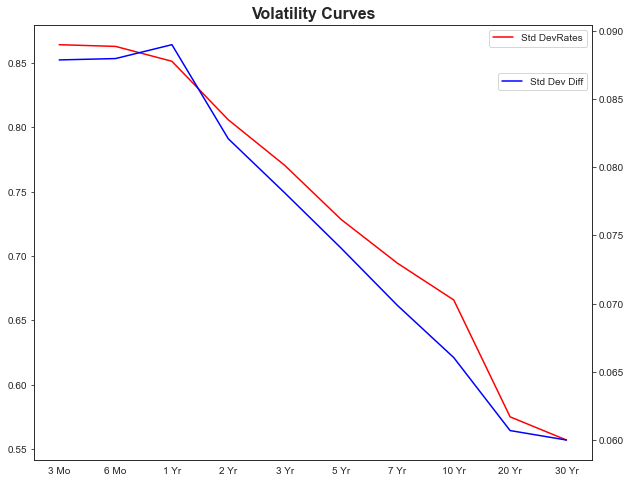

In [76]:
#Interesting. Correlation higher in the front end of the curve than long end.

sns.set_style('white') # setting style
plt.subplots(figsize=(10, 8)) # setting figure size
sns.lineplot(data=rates_std, label='Std DevRates', color="r")
ax2 = plt.twinx()
sns.lineplot(data=diff_std, label='Std Dev Diff', color="b", ax=ax2)
plt.title('Volatility Curves', fontsize=16, fontweight='bold') 
plt.legend(bbox_to_anchor=(1.0, 0.9))
plt.show()